## Overview

Data and mathematical models that explain or predict data are at the foundation of science. So, knowing how to interpret, analyze, and manipulate data is fundemental to being scientifically literate. In this notebook, let's take a look at a dataset courtesy of Kaggle.com. The data is from wine reviews scaped from WineEnthusiast.com. It is multidemensional (see above) including the price, country of origin, grape variety, and point rating awarded to each wine. Below we will take a preliminary look at this dataset. We will consider how the different dimensions of the dataset are similar and different and will visualize the data in a number of different ways. After this notebook you will know:
* the difference between nominal, ordinal, interval, and ratio data.
* how a histogram and box (and whisker) plot can communicate information about the distribution of data. 
* properties of a normal (Gaussian) distribution 

This notebook uses Python, which is a powerful programming language prfered by many data scientists. You probably have at least some experience doing data analysis in Excel and might have some experience using some other software package/language such as SPSS or R. In the end, I don't care what tools you use to do the statitical analysis required to complete your researh paper. Use what works for you. However, I will be predominatly be using Python in class and encourage you to learn how to use it too. 

In [1]:
# Python uses packages to simplify data manipulation and analysis. Three of the most important packages
# are called Numpy, Pandas, and Matplotlib
import numpy as np # linear algebra and data processing
import pandas as pd # data processing and file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for ploting data
import seaborn as sns # makes even nicer plots (might use, don't know)

The following cell will import the WineEnthusiast data set using pandas. The data is linked to above and is formated as a CSV (comma-separated-values) file. Such a file could be opend in Excel but here we simply load the file into a pandas data structure called a dataframe and print out the first couple rows of the dataframe.

In [3]:
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/winemag-data-130k-v2.tar.gz"
wine_data = pd.read_csv(url, compression='gzip')
print(wine_data.head())

   winemag-data-130k-v2.csv   country  \
0                       0.0     Italy   
1                       1.0  Portugal   
2                       2.0        US   
3                       3.0        US   
4                       4.0        US   

                                         description  \
0  Aromas include tropical fruit, broom, brimston...   
1  This is ripe and fruity, a wine that is smooth...   
2  Tart and snappy, the flavors of lime flesh and...   
3  Pineapple rind, lemon pith and orange blossom ...   
4  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco    87.0    NaN  Sicily & Sardinia   
1                            Avidagos    87.0   15.0              Douro   
2                                 NaN    87.0   14.0             Oregon   
3                Reserve Late Harvest    87.0   13.0           Michigan   
4  Vintner's Reserve Wild Child Block    

## Different Kinds of Data
As you can see, the WineEnthusiast dataset includes different dimensions with very different properties. For example, some of the data are character strings representing grape names or country names, others are numerical such as price. Moreover, the data can be classified based on the type of scale it is based on. For example, the price data is based on a scale that starts at zero (\$0.00) and has a well-defined interval between values on this scale. In other words, the interval between \$1.00 and \$2.00 is the same as the interval between \$5.00 and \$6.00. Such data (called ratio data) iis very nice to work with for a variety of reasons but other types of data scales exist. Here is a summary of four different types of data including examples of each from the WineEnthusiasts data. 
* **Nominal** data are categorical labels, symbols, or names without numerical significance or natural order. However, nominal data can be tabulated into frequency tables. Later we will learn a test called the chi-squared test that is useful for interpreting nominal data sets. The countries, variety, and winery dimensions of the WineEnthusiast data are examples of nominal data.
* **Ordinal** data are numbers, labels, or symbols that have a definite order or hierarchy but there is no gaurentee that the intervals between adjacent labels is uniform. For example, a list of the finishing order of runners in a marathon would be an example of ordinal data. The points dimension of the WineEnthusiast data is probably ordinal because these values are assigned by subjective wine tasters. However, below we will treat it as interval data.
* **Interval** data are numbers with a definite order and a well defined and constant interval between values. However, there is no absolute zero on the scale. The year of the vintage (which could be scraped from the title dimension) is an example of interval data.
* **Ration** data (see above) are numbers with a both constant interval and a scale with an absolute zero. As prevously mentioned wine price is an example or ratio data.

## Visualizing Categorical Data
Categorical or nominal data can be visualized with a bar plot with categories along the x-axis and frequencies along the y axis. Below the frequencies of some of the grape varieties in the WIneEnthusiast dataset are plotted.

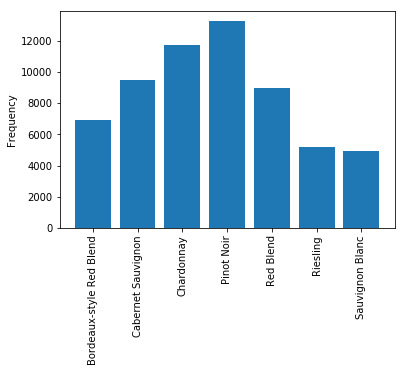

In [4]:
import collections # so I can use a handly method called Counter()
variety_counts = collections.Counter(wine_data["variety"].astype('str'))
variety_counts = dict(variety_counts.most_common(7)) # only look at the seven most common varieties
varieties = variety_counts.keys()
counts = variety_counts.values()
plt.bar(varieties, counts)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

## Visualizing Numerical Data Distributions with a Histogram
Although the "points" data may in fact be ordinal because it is assigned by subjective tasters, here let's treat it as interval data so, for example, a score of 89 is always better than a score of 85 by exactly the same amount as a 96 is better than a 92 (interval of four degrees of taste or something like that in both cases). When data is numerical and of the interval or ratio type we can visualize the distribution of the data by generating a histogram where the data is bined by value and the number or frequency of data points in each bin is plotted as bar height along the y-axis.  Below the distribution of point scores for all wines in the data set is shown.

In [5]:
# how many wines are scored and how many uniquely different scores are possible in this data set?
scores = wine_data["points"]
print("A total of {} wines are scored in the data set.".format(len(scores)))
print("The possible scores are:")
print(np.unique(scores))

A total of 129972 wines are scored in the data set.
The possible scores are:
[  80.   81.   82.   83.   84.   85.   86.   87.   88.   89.   90.   91.
   92.   93.   94.   95.   96.   97.   98.   99.  100.   nan]


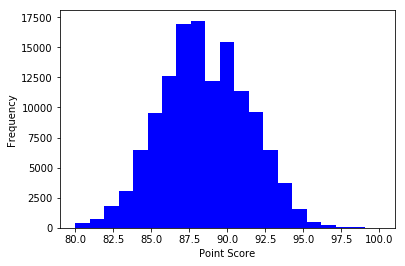

In [7]:
# since there are 21 possible point scores lets make a histogram with 21 bins
scores = scores[scores>0] # get rid of nan
plt.hist(scores,bins=21,color='b',alpha=1) # could be more specific with bin edges but this is good enough
plt.xlabel('Point Score')
plt.ylabel('Frequency')
plt.show()

## Box (and Whisker) Plot
Another kind of plot that is useful for visually summarizing a data distribution is called a box plot sometimes called a box and whisker plot. Below is a box plot for the wine point score data set plotted above. The width of the box in the middle shows what is called the interquartile range (IQR), which is the distance between the point below which 25% of the data falls (the 1st quartile) and the point below which 75% of the data falls (3rd quartile). The line in the middle of the box shows the point below which 50% of the data falls (2nd quartile, also called the median). The lines extending from either side show the extent of the maximum and minimum values in the data set or if there are outliers these lines extend to 1.5 times the IQR in either direction and the outliers are indicated with dots.

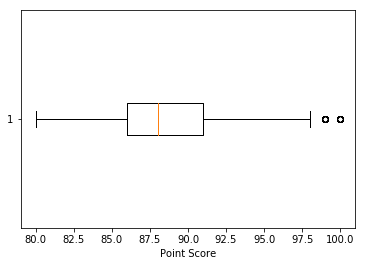

In [8]:
# boxplot shows 1st (25%), 2nd (50%, median), and 3rd (75%) quartiles
# shows min/max and/or 1.5xIQR 
# may also show outliers
plt.boxplot(scores, vert=False)
plt.xlabel('Point Score')
plt.show()

## Population Versus Sample
Since the histogram above includes a data point for every single wine ever reviewed by WineEnthusiast (let's assume), it represents the entire population. Most of the time we don't have data sets that encapulate the entire population. For example, if we wanted to study the relationship between human height and big toe length, you couldn't measure the height and big toe length of every human being. Instead, you would take a sample from the population and try to infer information about the population from this sample. Below is a histogram generated from a sample (only 5k of over 120k wine reviews) of wine point scores taken from the population shown above. What do you notice about the shape of this histogram compared to the shape of the histogram above? In general, we expect a sample from a population (assuming it is a sufficiently large sample) to have the same shape distribution (albeit smaller magnitude frequencies) as the population from which it was drawn. 

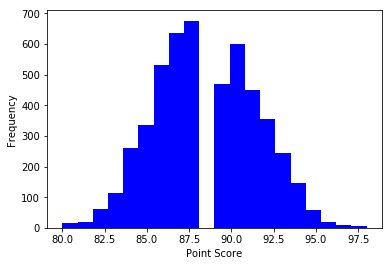

In [9]:
scores_sample = scores.sample(5000)
plt.hist(scores_sample,bins=20,color='b',alpha=1) # could be more specific with bin edges but this is good enough
plt.xlabel('Point Score')
plt.ylabel('Frequency')
plt.show()

## Normal or Gaussian Distribution
Although it isn't the best example, the distribution of wine point scores shown above is pretty symmetric. One may even say the distributoin is "bell shaped". Most of the scores are in the middle of the range of possible values and the frequencies of both high and low scores are much less than the frequency of scores in the middle. The most important distribution in statistics and probably all of science is a distribution that looks very much like this called the normal or Gaussian distribution. Strickly speaking, the distribution of wine point scores is can not be Gaussian because it is bounded on both sides (minimum of 80 and maximum of 100) and ther scores themselves are probably not really interval data. It also looks a little skewed to the left, which means that tail on the lower end of the scale is longer then the tail at the higher end of the scale. A true Gaussian is symmetric about the peak. Below is a true Gaussian distribution plotted from randomly generated normally distributed data.

In [ ]:
gaussian_data = np.random.normal(loc=0, scale=1, size=10000)
plt.hist(gaussian_data,bins=50,color='b',alpha=1)
plt.ylabel('Frequency')
plt.show()

## Parametric Distributions
The normal distribution is a parametric distribution, which means it can be described by a finite number of parameters. In fact, all noramal distributions can be described with precisely two parameters, namely a mean and a variance (or standard deviation). In statistics, most tests on data samples make assumptions about the distribution of the underlying population from which the data is drawn. In many situations, the assumpiton is that the underlying distribiton is a normal distribution. Such tests are called parameteric tests even though there are other "parametric" distributions besides the normal distribution. Since data must have a ratio or interval scale to be normally distributed, parametric tests are not applicable to ordinal or nominal datasets. Statistical tests that supposedly do not make particular assumptions about the distribution from which a sample is drawn are called non-parametric tests. Strickly speaking this is a misnomer becuase even non-parametric tests make some kind of assumptions about the data.

## A Non-Normal Distribution
As stated above, a distribution that is not normal is often refered to as non-parametric. In truth, the distribution could actually be parametric in that a finate set of parameters specifies the shape of the distribution. But, when statisticians say parametric, they usuallly mean the underlying distribution is normal. Below is a histogram of the prices of the wines in the WineEnthusiast database. It is plotted twice, once with a linear-scale y-axis and once with a log-scale y-axis to show the infrequent prices on the high end more clearly. This is definately not a normal distribution. In fact, it looks a lot like an exponential distribution.

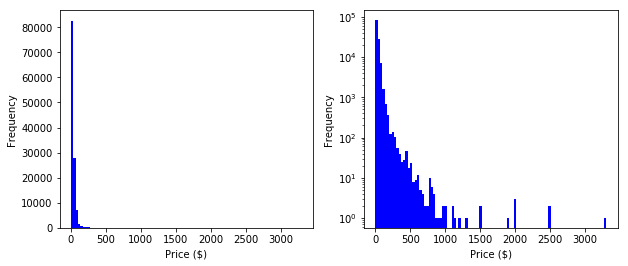

In [10]:
prices_idx = wine_data.index[wine_data["price"] >= 0] # get rid of wines without a specified price
prices = wine_data.loc[prices_idx,"price"]

fig = plt.figure(0, [10,4])
(ax1, ax2) = fig.subplots(1,2)
ax1.hist(prices,100,color="b")
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Price ($)')
ax2.hist(prices,100,log=True,color="b")
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Price ($)')
plt.show()

## The Central Limit Theorem
One of the most important theorems in prabability and statistical theory is called the Central Limit Theorem. This theorem states that even when the distribution from which a sample is drawn is not normal, the distributon of sample means will be normal if the sample size is sufficiently large. In other words, if we repeatedly sample from a population, a historgram of the means of these samples will approach a normal distribution as the sample size and number of samples gets big. The three histograms below show the distribution of sample means from the price data for three different sample sizes, 10, 100, and 1000. In addition to the distribution getting more normal as the sample size increases, notice that the range of likely average prices is also getting narrower. In other words, as sample size increases, sample distributions become less variable. In the next unit we will take a closser look at measures of central tendency such as the mean, median, and mode and measures of variability. 

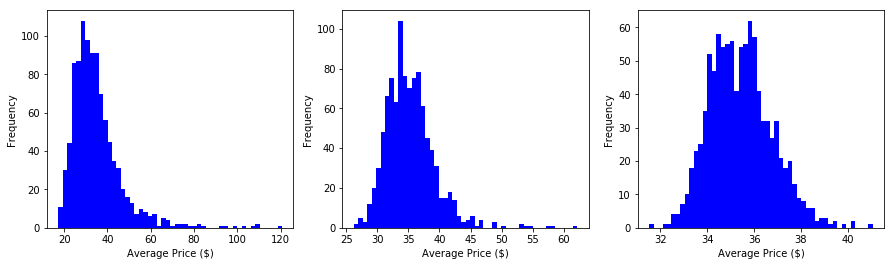

In [11]:
def get_sample_means(data,n_samples,sample_size):
    sample_means = []
    for ii in range(n_samples):
        sample = data.sample(sample_size,replace=True)
        sample_means.append(sample.mean())
    return sample_means

fig = plt.figure(0, [15,4])
(ax1, ax2, ax3) = fig.subplots(1,3)
ax1.hist(get_sample_means(prices,1000,10),50,color="b")
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Average Price ($)')
ax2.hist(get_sample_means(prices,1000,100),50,color="b")
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Average Price ($)')
ax3.hist(get_sample_means(prices,1000,1000),50,color="b")
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Average Price ($)')
plt.show()